In [ ]:
# Download the Netflix movies and TV shows dataset from Kaggle
# (No immediate output, file will be downloaded.)
!kaggle datasets download -d satpreetmakhija/netflix-movies-and-tv-shows-2021

!unzip netflix-movies-and-tv-shows-2021

Dataset URL: https://www.kaggle.com/datasets/satpreetmakhija/netflix-movies-and-tv-shows-2021
License(s): CC0-1.0
netflix-movies-and-tv-shows-2021.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-movies-and-tv-shows-2021.zip
replace netflixData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install plotly pycountry

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# Import necessary libraries
from plotly.offline import iplot
from collections import Counter
import pycountry

In [ ]:
sns.set_style('whitegrid')
sns.set_context("paper")
sns.set_palette('colorblind')

In [ ]:
# Load the Netflix dataset into a pandas DataFrame
data = pd.read_csv('/content/netflixData.csv')

# Exploratory analysis and Data cleaning

In [ ]:
# Preview the first five rows of the dataset
data.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [ ]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.2+ KB


In [ ]:
# Calculate the percentage of missing values in each column
(data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

,0
Director,34.590246
Date Added,22.373052
Imdb Score,10.189375
Production Country,9.368192
Cast,8.882185
Rating,0.067035
Release Date,0.050277
Duration,0.050277
Show Id,0.000000
Title,0.000000


I will be imputating null values that are 5% and above, less than that are getting eliminated. This new data will be presented on a new dataframe.

In [ ]:
data_clean = data.copy()

In [ ]:
# First cleaning for the variable with most null values, we replace nan with No Data
data_clean['Director'] = data['Director'].replace({np.nan:'No Data'})

In [ ]:
# Then we jump to the next variable with most null values, changing the dtype and then filling the null value with the next valid observation to fill the gap
data_clean['Date Added'] = pd.to_datetime(data['Date Added'])

data_clean['Date Added'] = data_clean['Date Added'].bfill()

In [ ]:
# Following the list, we check Imdb score, to clean de "/10", change the dtype
data['Imdb Score'].unique()

array(['6.6/10', '6.2/10', '6.4/10', '5.1/10', '7.0/10', '5.8/10',
       '6.0/10', '6.1/10', '7.5/10', '5.5/10', '7.6/10', '6.5/10',
       '6.7/10', '7.4/10', '7.7/10', '8.3/10', '5.9/10', '6.9/10', nan,
       '5.7/10', '7.9/10', '6.8/10', '4.8/10', '8.4/10', '4.7/10',
       '3.5/10', '7.2/10', '3.8/10', '4.4/10', '1.9/10', '6.3/10',
       '3.2/10', '4.6/10', '5.2/10', '5.3/10', '5.6/10', '4.0/10',
       '7.3/10', '5.0/10', '4.5/10', '2.0/10', '8.0/10', '8.8/10',
       '8.1/10', '7.8/10', '8.5/10', '5.4/10', '4.9/10', '7.1/10',
       '1.3/10', '4.1/10', '8.2/10', '2.8/10', '3.1/10', '2.5/10',
       '4.2/10', '2.4/10', '4.3/10', '8.6/10', '3.9/10', '3.0/10',
       '8.7/10', '9.0/10', '9.3/10', '2.3/10', '2.6/10', '3.7/10',
       '3.4/10', '8.9/10', '3.3/10', '9.4/10', '3.6/10', '9.1/10',
       '2.9/10', '2.2/10', '1.8/10', '2.7/10', '2.1/10', '9.2/10',
       '1.7/10'], dtype=object)

In [ ]:
data_clean['Imdb Score'] = data['Imdb Score'].str.rstrip('/10')

data_clean['Imdb Score'] = data_clean['Imdb Score'].astype(float)

In [ ]:
# here we can look at mean and median of Imdb Score, they are almost the same, so we could replace null values with either of them
# but i chose median due to its non variability to extreme values
data_clean['Imdb Score'].describe()

,Imdb Score
count,5359.000000
mean,6.548591
std,1.173410
min,1.300000
25%,5.900000
50%,6.700000
75%,7.400000
max,9.400000


In [ ]:
data_clean['Imdb Score'] = data_clean['Imdb Score'].fillna(data_clean['Imdb Score'].median())

In [ ]:
# For production country replace null values with mode because its an object dtype
data_clean['Production Country'] = data['Production Country'].fillna(data['Production Country'].mode()[0])

In [ ]:
# Unlike country of production, cast, has many names within a single observation, so most of its values ​​are unique, there is no representative mode of the data
data_clean['Cast'] = data['Cast'].replace({np.nan:'No Data'})

In [ ]:
data_clean = data_clean.dropna()

In [ ]:
data_clean.reset_index(drop=True, inplace=True)

In [ ]:
data_clean.duplicated().sum()

0

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5963 entries, 0 to 5962
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Show Id             5963 non-null   object        
 1   Title               5963 non-null   object        
 2   Description         5963 non-null   object        
 3   Director            5963 non-null   object        
 4   Genres              5963 non-null   object        
 5   Cast                5963 non-null   object        
 6   Production Country  5963 non-null   object        
 7   Release Date        5963 non-null   float64       
 8   Rating              5963 non-null   object        
 9   Duration            5963 non-null   object        
 10  Imdb Score          5963 non-null   float64       
 11  Content Type        5963 non-null   object        
 12  Date Added          5963 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(10)
mem

# General Analysis

We can see on the chart below, there are more movies than TV Shows on this Netflix catalog data. Movies are more than 50% of the total catalog.

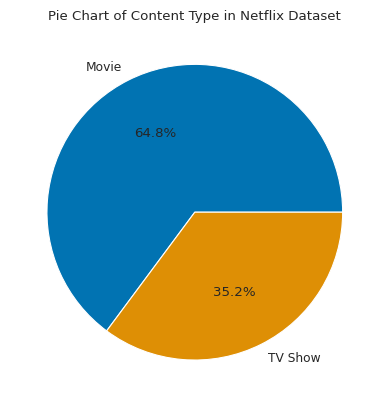

In [ ]:
# proportion of type of content in dataset
plt.pie(data_clean['Content Type'].value_counts(normalize=True), autopct='%1.1f%%', labels=data_clean['Content Type'].value_counts().index)
plt.title('Pie Chart of Content Type in Netflix Dataset')
plt.show()

In [ ]:
year_added = data_clean['Date Added'].dt.year

data_clean[data_clean['Content Type'] == 'Movie'].groupby(year_added)['Show Id'].count()

,Show Id
Date Added,
2008,1
2009,2
2011,13
2012,1
2013,3
2014,13
2015,35
2016,152
2017,393


On the next chart, since 2016 the Netflix catalog has increased a lot, in an exponential way. In 2020 had a peak, and then it began to decrease.

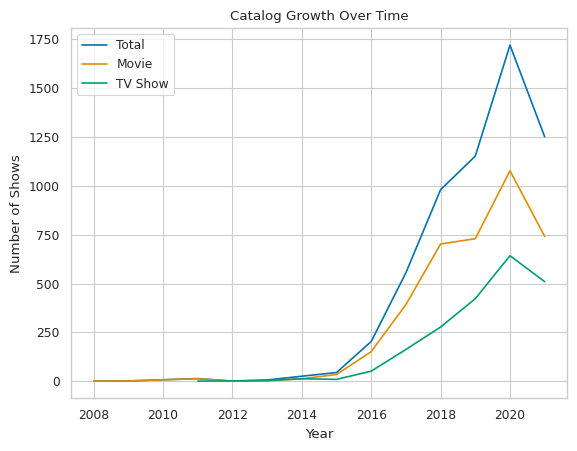

In [ ]:
year_added = data_clean['Date Added'].dt.year

catalog_growth = data_clean.groupby(year_added)['Show Id'].count()
catalog_growth_movies = data_clean[data_clean['Content Type'] == 'Movie'].groupby(year_added)['Show Id'].count()
catalog_growth_tv = data_clean[data_clean['Content Type'] == 'TV Show'].groupby(year_added)['Show Id'].count()

catalog_growth.plot(kind='line', label='Total')
catalog_growth_movies.plot(kind='line', label='Movie')
catalog_growth_tv.plot(kind='line', label='TV Show')
plt.title('Catalog Growth Over Time')
plt.xlabel('Year')
plt.legend()
plt.ylabel('Number of Shows')
plt.show()

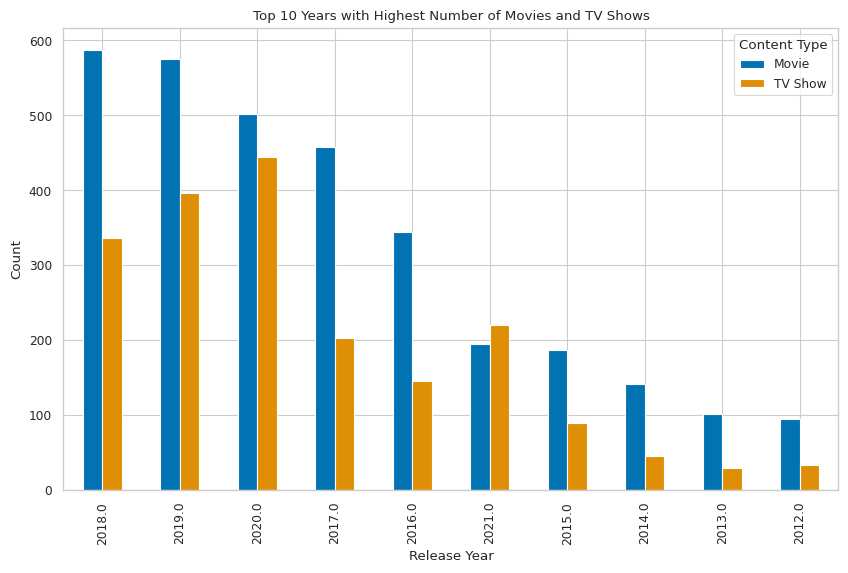

In [ ]:
# top 10 years with highets number of movies and tv shows
type_by_year = data_clean.pivot_table(index='Release Date', columns='Content Type', aggfunc='count', values='Show Id', fill_value=0)
top10_type_by_year = type_by_year.sort_values(by=['Movie','TV Show'], ascending=False).head(10)

top10_type_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Years with Highest Number of Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# top 10 Directers
data_clean['Director'].value_counts().head(10)


,count
Director,
No Data,2063
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,15
Jay Karas,14
Cathy Garcia-Molina,12
Youssef Chahine,12
Jay Chapman,11
Don Michael Paul,8


In [ ]:
#showing data were Chile was the production country
data_clean[data_clean['Production Country'] == 'Chile'][['Title','Description','Content Type']]

,Title,Description,Content Type
1470,El Reemplazante,A former high-ranking financial executive find...,TV Show
1554,Fabrizio Copano: Solo pienso en mi,Fabrizio Copano takes audience participation t...,Movie
2336,Jani Dueñas: Grandes fracasos de ayer y hoy,Chilean comedian and personality Jani Dueñas p...,Movie
3054,Mi amigo Alexis,When a young soccer fan and his idol forge an ...,Movie
3233,Mujeres arriba,A trio of best friends — a carefree bacheloret...,Movie
3360,Natalia Valdebenito: El especial,A Chilean comedian fuses activism with irrever...,Movie
3427,Nobody Knows I'm Here,"A former child singer, traumatized by his expe...",Movie


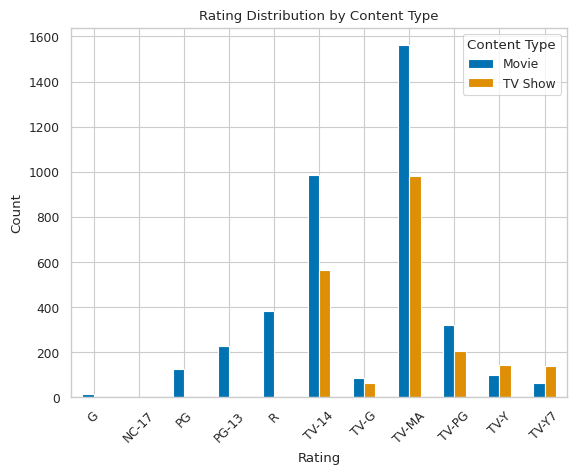

In [ ]:
#rating by content type (movies and tv shows)
rating_by_content_type = data_clean.pivot_table(index='Rating', columns='Content Type', aggfunc='count', values='Show Id', fill_value=0)

rating_by_content_type.plot(kind='bar')
plt.title('Rating Distribution by Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# G: General audiences
# NC-17: No one 17 and under admitted
# PG: Parental guidance suggested
# PG-13: Parents strongly cautioned
# R: Restricted
# TV-14: Parents strongly cautioned
# TV-G: General audience
# TV-MA: Mature audiences
# TV-PG: Parental guidance
# TV-Y: Children
# TV-Y7: Older children

In [ ]:
all_countries = []

# Recorremos todas las filas de la columna
for row in data_clean['Production Country']:
    # Dividimos la cadena en países usando coma+espacio como separador
    countries = [c.strip() for c in row.split(',') if c.strip() != ""]
    # Agregamos cada país a la lista
    all_countries.extend(countries)

# Ahora contamos la frecuencia total
country_counts = Counter(all_countries)

country_codes = {}
for country in pycountry.countries:
    # Guardamos en minúscula para facilitar búsqueda sin problemas de mayúsculas
    country_codes[country.name.lower()] = country.alpha_3

def geoplot(country_counts):

    # Diccionarios de apoyo
    country_with_code = {}  # { 'USA': 10, 'MEX': 5, ... }
    country_name_count = {} # { 'United States': 10, 'Mexico': 5, ... }

    for country_name, freq in country_counts.items():
        # Normalizamos a minúscula para buscarlo en 'country_codes'
        lower_name = country_name.strip().lower()

        # Chequeamos si está en el diccionario de códigos
        if lower_name in country_codes:
            code = country_codes[lower_name]
        else:
            code = None  # Si no lo encontramos, lo dejamos en None

        # Asignamos a los diccionarios
        if code:
            country_with_code[code] = country_with_code.get(code, 0) + freq
        # Guardamos también la versión original (sin código) por si la necesitamos
        country_name_count[country_name] = freq

    # 3. Crear el objeto 'data' para Plotly
    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        autocolorscale=True,
        reversescale=False,
        marker=dict(
            line=dict(color='gray', width=0.5)
        ),
        colorbar=dict(
            autotick=False,
            title=''
        ),
    )]

    # 4. Configurar el layout del mapa
    layout = dict(
        title='Países de producción en Netflix',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection=dict(type='Mercator')
        )
    )

    # 5. Crear la figura y mostrar
    fig = dict(data=data, layout=layout)
    iplot(fig, validate=False, filename='d3-world-map')

    return country_name_count


country_vals = geoplot(country_counts)

In [ ]:
data_tvshow = data_clean[data_clean['Content Type'] == 'TV Show']

In [ ]:
data_movie = data_clean[data_clean['Content Type'] == 'Movie']

In [ ]:
data_tvshow['Duration'].value_counts()

,count
Duration,
1 Season,1374
2 Seasons,357
3 Seasons,163
4 Seasons,83
5 Seasons,48
6 Seasons,29
7 Seasons,15
8 Seasons,11
9 Seasons,6


In [ ]:
data_tvshow[['Duration','Imdb Score']]

,Duration,Imdb Score
0,1 Season,6.6
3,1 Season,6.6
13,1 Season,7.5
14,1 Season,5.5
20,4 Seasons,7.5
...,...,...
5950,1 Season,5.7
5952,3 Seasons,6.6
5956,1 Season,7.0
5959,1 Season,6.7


In [ ]:
data_tvshow.groupby('Duration')['Imdb Score'].mean()

,Imdb Score
Duration,
1 Season,6.962737
10 Seasons,7.775000
12 Seasons,8.200000
13 Seasons,7.300000
15 Seasons,8.000000
17 Seasons,7.600000
2 Seasons,7.031373
3 Seasons,7.378528
4 Seasons,7.333735
